<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Project 3: Web API and NLP

# Contents:

Notebook Part 1 - Web Scraping

NoteBook Part 2 - Data Cleaning and NLP

NoteBook Part 3 - Processing & Modeling


# Part 2 - Data Cleaning and NLP

# Problem Statement:

The backend team has informed the data science team that the machine learning model frequently jumbled up the perfume and makeup categories and placed them in the incorrect forum.

A improved machine learning-based algorithm has been sought by the management team to find the appropriate category terms for cosmetics and scent. When the right words are chosen and sent to the relevant venue, the appropriate department can handle any problems or criticism.


# Data:

https://github.com/pushshift/api/blob/master/README.md

Subreddit websites that were used for scraping:
- https://api.pushshift.io/reddit/search/?subreddit=Perfumes
- https://api.pushshift.io/reddit/search/?subreddit=Makeup

# Importing Data and Package

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re
import nltk
from bs4 import BeautifulSoup  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import collections
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from matplotlib import colors
from matplotlib import cm
from pylab import rcParams
from wordcloud import WordCloud, STOPWORDS

In [3]:
pd.set_option('display.max_columns', 4000)
pd.set_option('display.max_rows', 4000)

In [4]:
perfumes = pd.read_csv('../datasets/perfumes.csv')
makeup = pd.read_csv('../datasets/makeup.csv')

In [5]:
display(perfumes.head(3))
display(makeup.head(3))

,subreddit,title,selftext,timestamp
0,Perfumes,Help Identifying Plz - Perfume?/Cologne? was p...,"I am attempting to identify and then locate, a...",2022-07-24 18:46:20
1,Perfumes,I’m looking for a perfume that has strong herb...,NaN,2022-07-24 19:02:56
2,Perfumes,Where can I find this?,NaN,2022-07-24 22:56:48


,subreddit,title,selftext,timestamp
0,Makeup,how can i tell if a girl has make-up on her fa...,NaN,2022-07-24 12:53:34
1,Makeup,Which mascara is better between better than se...,I have short and kinda flat lashes.,2022-07-24 13:12:31
2,Makeup,Friend “tried” all of my lipsticks.,I had a friend approach over and while she was...,2022-07-24 16:37:57


In [6]:
perfumes.isnull().sum()

subreddit       0
title           0
selftext     1991
timestamp       0
dtype: int64

In [7]:
makeup.isnull().sum()

subreddit      0
title          0
selftext     334
timestamp      0
dtype: int64

In [8]:
perfumes[perfumes['selftext'] == '[removed]']

,subreddit,title,selftext,timestamp
16,Perfumes,Calvin Klein Eternity For Man,[removed],2022-07-25 16:42:06
17,Perfumes,Calvin Klein Escape For Men,[removed],2022-07-25 17:07:57
18,Perfumes,Nautica Voyage Cologne By Nautica,[removed],2022-07-25 17:32:18
19,Perfumes,CK In 2u Perfume,[removed],2022-07-25 18:05:32
34,Perfumes,DAVIDOFF'S COOL WATER FOR MEN,[removed],2022-07-26 18:29:34
66,Perfumes,Estee Lauder Beautiful Women Edp Spray (Histor...,[removed],2022-07-28 21:32:03
80,Perfumes,Jean Paul Gaultier Le Male Summer,[removed],2022-07-29 17:24:09
81,Perfumes,The One Cologne For Men Dolce &amp; Gabbana,[removed],2022-07-29 17:33:56
144,Perfumes,Hugo Boss Selection 90ml For Men,[removed],2022-08-02 20:57:13
201,Perfumes,Please help (question),[removed],2022-08-06 15:47:43


In [9]:
makeup[makeup['selftext'] == '[removed]']

,subreddit,title,selftext,timestamp
4,Makeup,Any advice on how to do fluffy eyebrows,[removed],2022-07-24 18:40:22
6,Makeup,Henua Face And Body Toner Now Available In India,[removed],2022-07-24 21:46:37
15,Makeup,Nail polish: 5 tips to dry it faster,[removed],2022-07-25 03:30:48
23,Makeup,Personally I’m only here to sell solo videos o...,[removed],2022-07-25 07:14:01
24,Makeup,"nobody asked, but here are some of my personal...",[removed],2022-07-25 07:27:24
30,Makeup,Best Product For Teeth Whitening,[removed],2022-07-25 09:38:52
45,Makeup,How to replicate dark lids/undereyes after las...,[removed],2022-07-25 20:12:38
61,Makeup,Some dupes for Venus XS Silver needed!,[removed],2022-07-26 01:57:23
62,Makeup,i need hair help!!,[removed],2022-07-26 02:22:23
65,Makeup,Try These Awesome Makeup Products and Tools.,[removed],2022-07-26 03:00:58


Observations:

Although some selftext contain the words "removed" or "deleted," there are titles that contain terms that help us comprehend and distinguish between the many types of "perfume" and "makeup," so we fill in the blanks for those selftext that do.

# Data Cleaning

In [10]:
# Creating a function to process the dataframe

def df_prep(df):
    
    # Filling null in 'selftext' with empty string
    df["selftext"].fillna("",inplace = True)
    # Replaced the [removed] in "selftext" with empty string
    df["selftext"].replace("[removed]"," ", inplace = True)
    # Replaced [deleted] in "selftext" with empty string
    df["selftext"].replace("[deleted]"," ", inplace = True)
    
    # Creating new "post" column by concating "title" and "selftext" and dropping the 'selftext' & 'title' & 'timestamp'
    df["post"] = df["title"] + " "  + df["selftext"] 
    df.drop(columns = ["selftext","title", "timestamp"], axis =1, inplace =True) 
    # Checking any duplicates and dropping it
    df.drop_duplicates(subset = ['post'], keep = 'first',inplace =True) 
    
    # Checking the shape to make sure we have enough data points and checking if miss out any null values
    print(df.shape)
    print(df.isnull().sum()) 
    
    return df

In [11]:
perfumes1 = df_prep(perfumes)
display(perfumes1.head())

(4050, 2)
subreddit    0
post         0
dtype: int64


,subreddit,post
0,Perfumes,Help Identifying Plz - Perfume?/Cologne? was p...
1,Perfumes,I’m looking for a perfume that has strong herb...
2,Perfumes,Where can I find this?
3,Perfumes,Any substitutes to The Body Shop’s discontinue...
4,Perfumes,Looking for recommendations of perfume that sm...


In [12]:
makeup1 = df_prep(makeup)
display(makeup1.head())

(5209, 2)
subreddit    0
post         0
dtype: int64


,subreddit,post
0,Makeup,how can i tell if a girl has make-up on her fa...
1,Makeup,Which mascara is better between better than se...
2,Makeup,Friend “tried” all of my lipsticks. I had a fr...
3,Makeup,What is the difference between a lip oil and a...
4,Makeup,Any advice on how to do fluffy eyebrows


Now that we are able to combine the selftext and title, we can start cleaning the data in the new column post

In [13]:
# Creating a function to remove any unneccessary string in post for makeup and perfumes

def regex_cleaning(row):
        
    # Remove links
    row['post'] = re.sub(
        pattern=r'\w+:\/\/[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', 
        repl='', 
        string=row['post'],
        flags=re.M)
    
    
    # Remove special terms    
    row['post'] = re.sub(
        pattern='#x200B;|&lt;|&gt;|&amp;|_',
        repl='',
        string=row['post'])

    
    # Remove all digits
    row['post'] = re.sub(
        pattern=r'\d+',
        repl='',
        string=row['post'])

    
    # Remove anything that is not a word
    row['post'] = re.sub(
        pattern=r'\W+',
        repl=' ',
        string=row['post'])

    return row

In [14]:
# Applying the cleaning function on perfume
perfumes2 = perfumes1.apply(regex_cleaning, axis =1)
display(perfumes2.head())

,subreddit,post
0,Perfumes,Help Identifying Plz Perfume Cologne was prono...
1,Perfumes,I m looking for a perfume that has strong herb...
2,Perfumes,Where can I find this
3,Perfumes,Any substitutes to The Body Shop s discontinue...
4,Perfumes,Looking for recommendations of perfume that sm...


In [15]:
# Applying the cleaning function on makeup
makeup2 = makeup1.apply(regex_cleaning, axis =1)
display(makeup2.head())

,subreddit,post
0,Makeup,how can i tell if a girl has make up on her fa...
1,Makeup,Which mascara is better between better than se...
2,Makeup,Friend tried all of my lipsticks I had a frien...
3,Makeup,What is the difference between a lip oil and a...
4,Makeup,Any advice on how to do fluffy eyebrows


In [16]:
# Combining two dataframes for later EDA plotting
perfume_makeup = pd.concat(objs = [perfumes2, makeup2], axis=0)

# Removing any duplicates found
perfume_makeup.drop_duplicates(subset = ['post'], keep="first", inplace=True)

# Resetting the index
perfume_makeup.reset_index(inplace=True, drop=True)
perfume_makeup.head(30)

,subreddit,post
0,Perfumes,Help Identifying Plz Perfume Cologne was prono...
1,Perfumes,I m looking for a perfume that has strong herb...
2,Perfumes,Where can I find this
3,Perfumes,Any substitutes to The Body Shop s discontinue...
4,Perfumes,Looking for recommendations of perfume that sm...
5,Perfumes,Looking for new perfume recommendations I m lo...
6,Perfumes,I need a body spray for layering JPG Scandal H...
7,Perfumes,Anyone have any suggestions for vanilla perfum...
8,Perfumes,Cheap perfume body mists recs I have been into...
9,Perfumes,anyone recognize any of these bottles


In [17]:
perfume_makeup.shape

(9222, 2)

# Tokenizer, lemmatizer and removing stop words

    We are choosing lemmatizer cause we are going for precision for the word.

In [18]:
# Creating a function to tokenize and lowercase the words. 
# Lemmatizer is then used as stemming has a penchant for creating non-english words.
# And removing stopwords

def tok_lem (df):
    
    # Tokenize words
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    words = tokenizer.tokenize(df.lower())
    
    # Instantiate lemmatizer.
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words 
    lemmat = [lemmatizer.lemmatize(i) for i in words]
    
    # Filtering stopwords, addn_words would be added trail and error based on later results
    addn_words=['', 'perfume', 'makeup', 'perfumes']
    stops = stopwords.words('english')
    stops.extend(addn_words)
    
    # Removing stop words
    useful_words = [w for w in words if not w in stops]
    
    # Join words back and separated by a space 
    return (" ".join(useful_words))

In [19]:
# Applying cleaning functions on perfumes2, makeup2 and perfume_makeup
perfumes2['post'] = perfumes2['post'].apply(tok_lem)
makeup2['post'] = makeup2['post'].apply(tok_lem)
perfume_makeup['post'] = perfume_makeup['post'].apply(tok_lem)

In [20]:
# Checking perfumes2 & makeup
perfumes2

,subreddit,post
0,Perfumes,help identifying plz cologne pronounced gras a...
1,Perfumes,looking strong herb garden notes added floral ...
2,Perfumes,find
3,Perfumes,substitutes body shop discontinued red musk lo...
4,Perfumes,looking recommendations smell like shampoo rea...
...,...,...
4179,Perfumes,bidding ebay seller russia thoughts reliable
4180,Perfumes,help identify
4181,Perfumes,got really nice offer one seller claims tester...
4182,Perfumes,received annual christmas fragrance sampler lo...


In [21]:
perfumes2.head()

,subreddit,post
0,Perfumes,help identifying plz cologne pronounced gras a...
1,Perfumes,looking strong herb garden notes added floral ...
2,Perfumes,find
3,Perfumes,substitutes body shop discontinued red musk lo...
4,Perfumes,looking recommendations smell like shampoo rea...


In [22]:
makeup2

,subreddit,post
0,Makeup,tell girl make face naturally beauty skin
1,Makeup,mascara better better sex iconic roller lash s...
2,Makeup,friend tried lipsticks friend approach bathroo...
3,Makeup,difference lip oil lip gloss lip oil lip balm ...
4,Makeup,advice fluffy eyebrows
...,...,...
5244,Makeup,hope like gift lol
5245,Makeup,best sex proof mascara kiss proof lip stick ti...
5246,Makeup,fed looking lip colours suit pale skin green e...
5247,Makeup,good eyeliner recommendations


In [23]:
makeup2.head()

,subreddit,post
0,Makeup,tell girl make face naturally beauty skin
1,Makeup,mascara better better sex iconic roller lash s...
2,Makeup,friend tried lipsticks friend approach bathroo...
3,Makeup,difference lip oil lip gloss lip oil lip balm ...
4,Makeup,advice fluffy eyebrows


In [24]:
perfume_makeup

,subreddit,post
0,Perfumes,help identifying plz cologne pronounced gras a...
1,Perfumes,looking strong herb garden notes added floral ...
2,Perfumes,find
3,Perfumes,substitutes body shop discontinued red musk lo...
4,Perfumes,looking recommendations smell like shampoo rea...
...,...,...
9217,Makeup,hope like gift lol
9218,Makeup,best sex proof mascara kiss proof lip stick ti...
9219,Makeup,fed looking lip colours suit pale skin green e...
9220,Makeup,good eyeliner recommendations


In [25]:
perfume_makeup.head()

,subreddit,post
0,Perfumes,help identifying plz cologne pronounced gras a...
1,Perfumes,looking strong herb garden notes added floral ...
2,Perfumes,find
3,Perfumes,substitutes body shop discontinued red musk lo...
4,Perfumes,looking recommendations smell like shampoo rea...


In [26]:
# Checking if there is any null value
print(perfumes2.isnull().sum())
print(makeup2.isnull().sum())
print(perfume_makeup.isnull().sum())

subreddit    0
post         0
dtype: int64
subreddit    0
post         0
dtype: int64
subreddit    0
post         0
dtype: int64


In [27]:
# Now that both the perfumes and makeup are cleaned, saving them into a new seperate dataframe
perfumes2 = pd.DataFrame(perfumes2)
makeup2 = pd.DataFrame(makeup2)
perfume_makeup = pd.DataFrame(perfume_makeup)

# Basic EDA


Before we CountVectorize() the contents of all our reddit comments, let's first look at some basic EDA on our post lengths. To do this, let's add two extra columns to our current DataFrame, word_count and comment_length. With these two columns we can see if any patterns emerge based on the subreddit. Maybe Perfumes post longer comments than Makeup.



# Data Visualization

We visualize the overall data to note the overall frequency of usage.

Word Count
We visualize the difference in word count for both subreddits in the graph below. The following are the steps we took to create the visualization:

1. Create and apply function for word count
2. Word count visualization


In [28]:
perfumes2['comment_length'] = perfumes2['post'].apply(len)
perfumes2['word_count'] = perfumes2['post'].apply(lambda x: len(str(x).split()))

In [29]:
perfumes2.head()

,subreddit,post,comment_length,word_count
0,Perfumes,help identifying plz cologne pronounced gras a...,731,97
1,Perfumes,looking strong herb garden notes added floral ...,72,10
2,Perfumes,find,4,1
3,Perfumes,substitutes body shop discontinued red musk lo...,110,17
4,Perfumes,looking recommendations smell like shampoo rea...,217,28


In [30]:
makeup2['comment_length'] = makeup2['post'].apply(len)
makeup2['word_count'] = makeup2['post'].apply(lambda x: len(str(x).split()))

In [31]:
makeup2.head()

,subreddit,post,comment_length,word_count
0,Makeup,tell girl make face naturally beauty skin,41,7
1,Makeup,mascara better better sex iconic roller lash s...,68,11
2,Makeup,friend tried lipsticks friend approach bathroo...,368,58
3,Makeup,difference lip oil lip gloss lip oil lip balm ...,85,17
4,Makeup,advice fluffy eyebrows,22,3


In [32]:
perfume_makeup['comment_length'] = perfume_makeup['post'].apply(len)
perfume_makeup['word_count'] = perfume_makeup['post'].apply(lambda x: len(str(x).split()))

In [33]:
perfume_makeup.head()

,subreddit,post,comment_length,word_count
0,Perfumes,help identifying plz cologne pronounced gras a...,731,97
1,Perfumes,looking strong herb garden notes added floral ...,72,10
2,Perfumes,find,4,1
3,Perfumes,substitutes body shop discontinued red musk lo...,110,17
4,Perfumes,looking recommendations smell like shampoo rea...,217,28


In [34]:
print(' Longest 10 comments by Subreddit')
print(perfume_makeup.sort_values('word_count', ascending=False).head(10)['subreddit'])
print('\n')
print(' Shortest 10 comments by Subreddit')
print(perfume_makeup.sort_values('word_count', ascending=True).head(10)['subreddit'])
print('\n')

 Longest 10 comments by Subreddit
492     Perfumes
3478    Perfumes
4604      Makeup
4300      Makeup
5276      Makeup
982     Perfumes
2748    Perfumes
6190      Makeup
5328      Makeup
5604      Makeup
Name: subreddit, dtype: object


 Shortest 10 comments by Subreddit
8428      Makeup
615     Perfumes
5224      Makeup
41      Perfumes
627     Perfumes
5198      Makeup
642     Perfumes
8795      Makeup
3147    Perfumes
5065      Makeup
Name: subreddit, dtype: object




This is merely to observe some common features of the forums. 
Above we see the subreddits to which the top 10 shortest and top 10 longest comments belong to. For the longest comments, it seems to be an even split between both subreddits, but we can see that majority of the top 10 longest comments belong to the Makeup subreddit. 
Let's take this further and see the distribution of the posts based on each subreddit.
We can see that the bulk of comments that were the longest belonged to the category "Cosmetics." This may be because there are more words needed to describe makeup.

In [35]:
perfume_makeup.groupby('subreddit').mean()[['word_count', 'comment_length']]

,word_count,comment_length
subreddit,,
Makeup,36.093690,241.879761
Perfumes,25.568837,171.728131


Text(0.5, 0.98, 'Distribution of Comment Lengths Based on Subreddit')

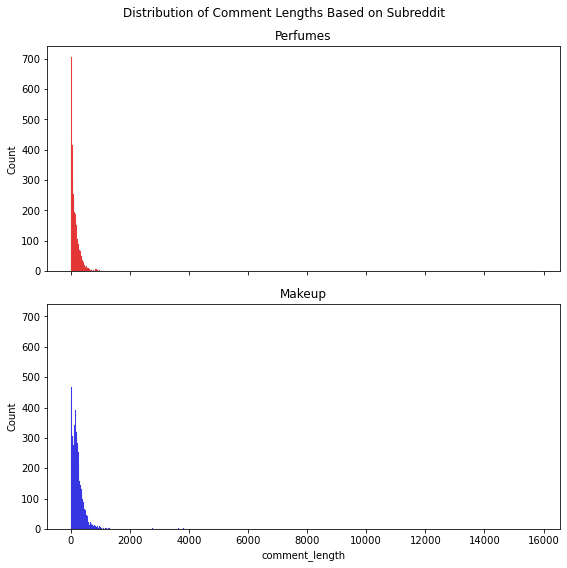

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), tight_layout=True, sharex=True, sharey=True)

sns.histplot(data=perfume_makeup[perfume_makeup['subreddit'] == 'Perfumes'], x='comment_length', color='red', ax=axes[0]).set(title='Perfumes')
sns.histplot(data=perfume_makeup[perfume_makeup['subreddit'] == 'Makeup'], x='comment_length', color='blue', ax=axes[1]).set(title='Makeup');

# Add a Top Title
fig.suptitle('Distribution of Comment Lengths Based on Subreddit', ha='center')

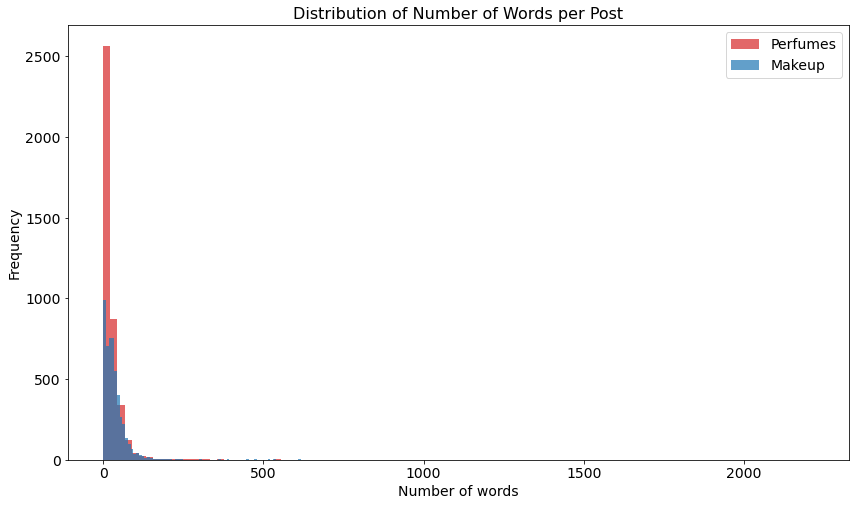

In [37]:
plt.figure(figsize=(14,8))

perfume_makeup[perfume_makeup['subreddit']=='Perfumes']['word_count'].plot(kind = 'hist', alpha = 0.7, 
                                                color='tab:red', label= 'Perfumes', bins = 100)
perfume_makeup[perfume_makeup['subreddit']=='Makeup']['word_count'].plot(kind = 'hist', alpha = 0.7, 
                                                   color='tab:blue', label = 'Makeup', bins = 100);
plt.title('Distribution of Number of Words per Post', fontsize=16)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)
plt.xlabel('Number of words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(prop={'size': 14});

Explanation of the above graphs:

Based on the histograms above, we can see that the distribution of comment lengths are quite similar between both subreddits. One thing to note is that the majority of short Makeup comment slightly out number the short Perfumes comments. This means that the Perfumes subreddit has a bit more shorter comments than Makeup.

Now that we looked at the comment lengths of each subreddit, it's time to look at the different words used in each subreddit. Each subreddit could have a set of words that are used more than the other. To do this we will need to CountVectorize our comments.


In [38]:
# Convert subreddit text into a single text
sep_perfumes_text = " ".join(post for post in perfumes2['post'])
sep_makeup_text = " ".join(post for post in makeup2['post'])
sep_perfumemakeup_text= " ".join(post for post in perfume_makeup['post'])

# Plot histograph; the top 20 most common words

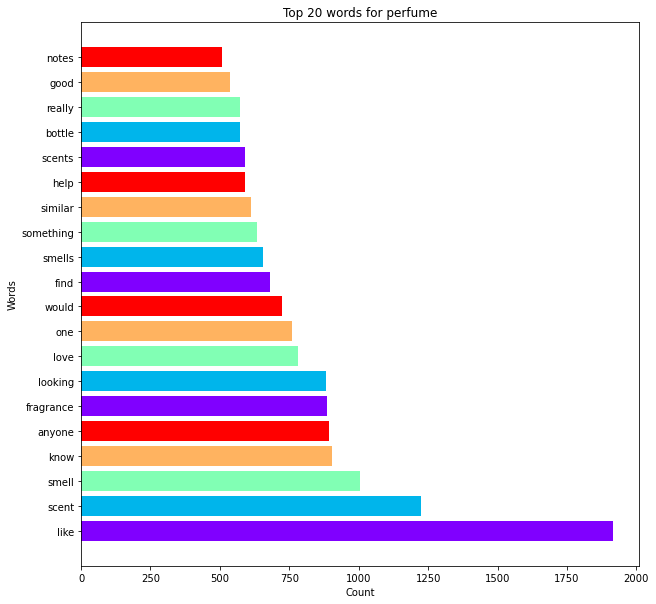

In [39]:
# Histograph for perfume
filtered_words1 = sep_perfumes_text.split()
counted_words1 = collections.Counter(filtered_words1)

words1 = []
counts1 = []
for letter, count in counted_words1.most_common(20):
    words1.append(letter)
    counts1.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for perfume')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words1, counts1, color=colors);

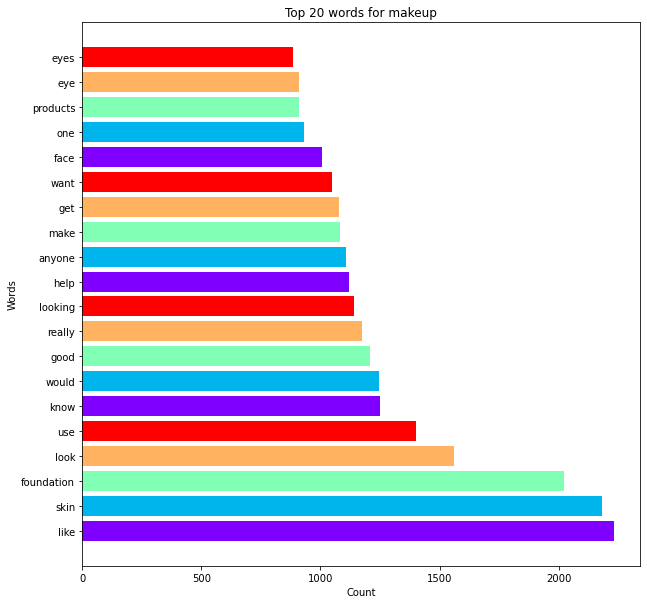

In [40]:
# Histograph for makeup
filtered_words2 = sep_makeup_text.split()
counted_words2 = collections.Counter(filtered_words2)

words2 = []
counts2 = []
for letter, count in counted_words2.most_common(20):
    words2.append(letter)
    counts2.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for makeup')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words2, counts2, color=colors);

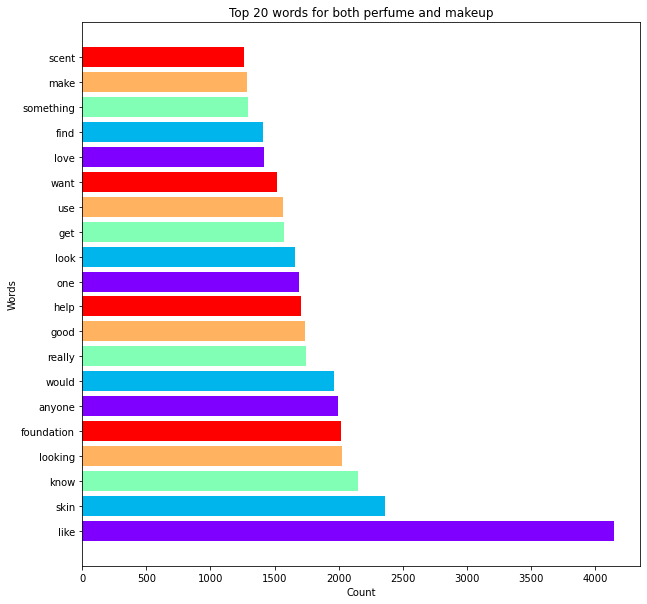

In [41]:
# Histograph for both perfume and makeup
filtered_words3 = sep_perfumemakeup_text.split()
counted_words3 = collections.Counter(filtered_words3)

words3 = []
counts3 = []
for letter, count in counted_words3.most_common(20):
    words3.append(letter)
    counts3.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for both perfume and makeup')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words3, counts3, color=colors);

Above is a list of the top 20 words used in each subreddit and the combined of both subreddit into one. As we can see both subreddits us the words 'like' the most. 
After that the subreddits start to differ a bit in the words they use the most.

# Generate a wordcloud for the respective subreddits


(-0.5, 799.5, 599.5, -0.5)

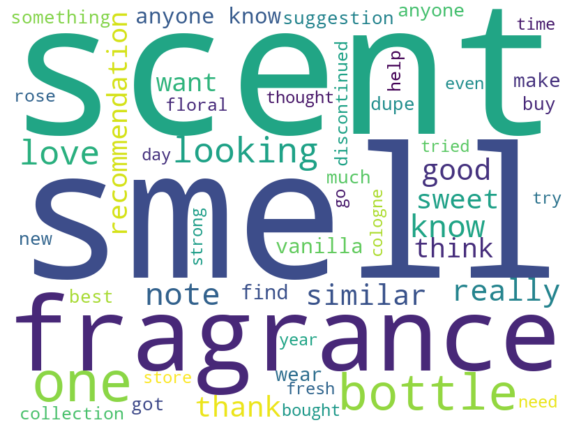

In [42]:
# Plot word cloud for perfumes 
wc1 = WordCloud(max_words=50, width=800, height=600, 
              background_color='white', min_font_size =10).generate(sep_perfumes_text)

plt.figure(figsize=(10,10))
plt.imshow(wc1,interpolation='bilinear')
plt.axis("off")

(-0.5, 799.5, 599.5, -0.5)

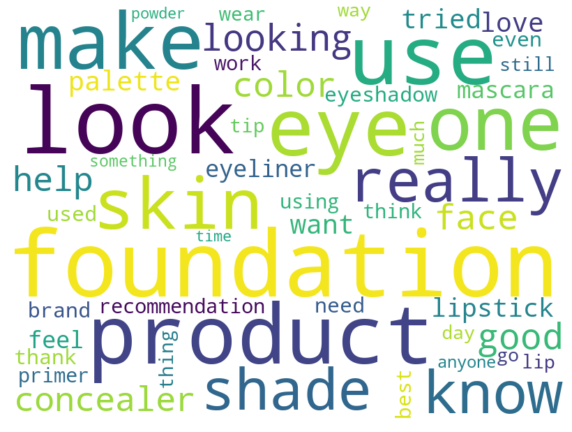

In [43]:
# Plot word cloud for makeup
wc2 = WordCloud(max_words=50, width=800, height=600, 
              background_color='white', min_font_size =10).generate(sep_makeup_text)

plt.figure(figsize=(10,10))
plt.imshow(wc2,interpolation='bilinear')
plt.axis("off")

#  CountVectorizer


Ngram Visualization:

Prior to ngram visualization, we would note that the frequency of the top-20 unigram far exceed that of the top-20 bigrams. As such, the frequency of occurence for the top bigram is smaller than the top 20th unigram. The same is true when comparing the frequency of bigrams to trigram. Therefore, if we set a different value for minimum and maximum ngram range, our top-20 results will only be words from the minimum ngram range. Hence, we set our minimum and maximum ngram range to be equal. This way, we obtain 1-word, 2-word, and 3-word ngrams separately.



In [44]:
# Create a function to pair up words by twos

def count_vec_2 (dfnfeature):
    # Create an instance of CountVectorizer
    # NGRAMS = 2
    cvec2 = CountVectorizer(ngram_range=(2,2), max_features = 500)

    # X_counts stores the vectorized version of the data
    X_counts_2 = cvec2.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_counts_2_df = pd.DataFrame(X_counts_2.toarray())
    X_counts_2_df.columns = cvec2.get_feature_names()
    X_counts_2_df
    return X_counts_2_df

In [45]:
# Perfumes texts top frequency 2 word phases
pcv2 = count_vec_2(perfumes2['post'])
pcv2.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


smells like          276
anyone know          250
smell like           203
eau de               152
tom ford             110
long lasting         104
would like           103
years ago             99
looking something     96
signature scent       95
something similar     88
really like           88
help find             84
de parfum             84
victoria secret       81
trying find           81
need help             76
bath body             75
please help           75
would love            70
thanks advance        70
let know              69
last long             69
body works            67
black opium           63
feel like             63
wondering anyone      58
marc jacobs           55
want something        54
hi everyone           54
dtype: int64

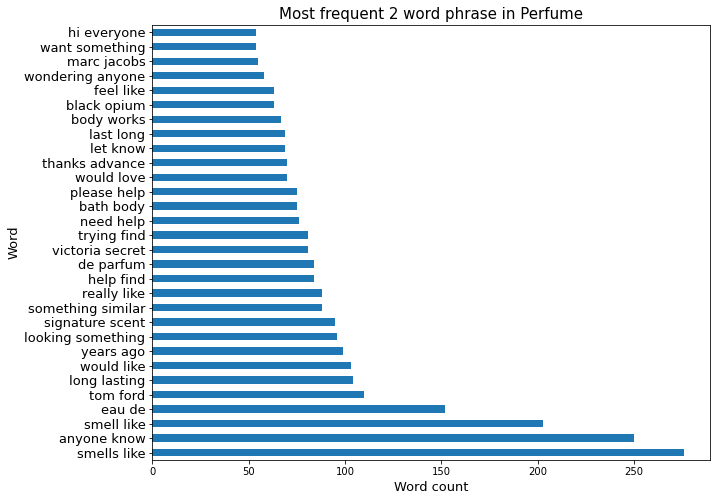

In [46]:
# Visualization for perfume (bi-grams)
plt.figure(figsize=(10,8))
pcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in Perfume', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [47]:
# Makeup texts top frequency 2 word phases
mcv2 = count_vec_2(makeup2['post'])
mcv2.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feel like               220
anyone know             203
dry skin                194
setting spray           163
look like               155
oily skin               146
skin tone               146
setting powder          142
please help             124
need help               119
thanks advance          118
would like              115
bb cream                113
tinted moisturizer      112
full coverage           111
really want             108
looks like               99
urban decay              94
foundation concealer     92
wondering anyone         90
eyeshadow palette        89
anyone else              88
lip gloss                88
really like              87
lip liner                87
looking something        84
hi everyone              83
dark circles             83
would love               83
make look                82
dtype: int64

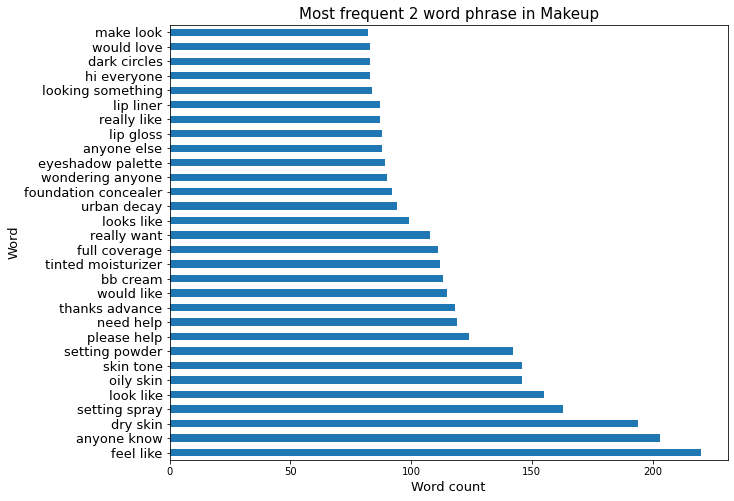

In [48]:
# Visualization for makeup (bi-grams)
plt.figure(figsize=(10,8))
mcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in Makeup', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [49]:
# Perfume and Makeup texts top frequency 2 word phases
pmcv2 = count_vec_2(perfume_makeup['post'])
pmcv2.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


anyone know          449
feel like            283
smells like          280
would like           218
smell like           204
please help          199
dry skin             196
need help            194
thanks advance       187
looking something    180
really like          175
years ago            168
look like            163
setting spray        163
long lasting         160
would love           153
eau de               152
wondering anyone     148
skin tone            146
oily skin            146
trying find          144
really want          142
setting powder       142
let know             137
hi everyone          137
anyone else          134
something similar    126
help find            123
looks like           119
tom ford             117
dtype: int64

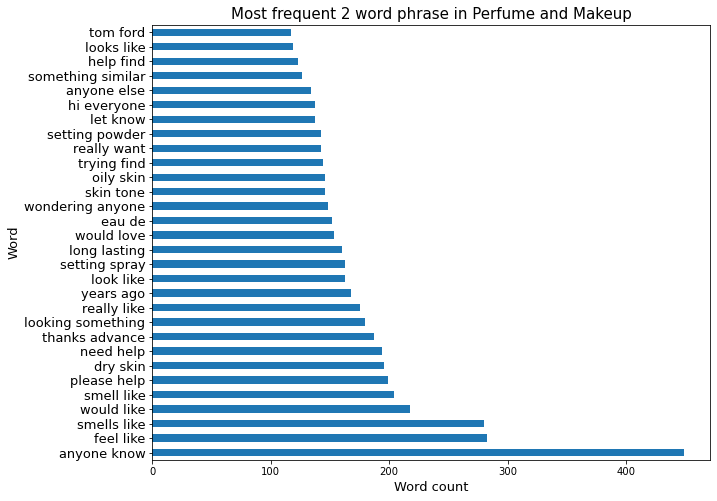

In [50]:
# Visualization for Perfume and Makeup (bi-grams)
plt.figure(figsize=(10,8))
pmcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in Perfume and Makeup', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [51]:
# Create a function to pair up words by threes

def count_vec_3 (dfnfeature):
    # Create an instance of CountVectorizer
    # NGRAMS = 3
    cvec3 = CountVectorizer(ngram_range=(3,3), max_features = 500)

    # X_counts stores the vectorized version of the data
    X_counts_3 = cvec3.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_counts_3_df = pd.DataFrame(X_counts_3.toarray())
    X_counts_3_df.columns = cvec3.get_feature_names()
    X_counts_3_df
    return X_counts_3_df

In [52]:
# Perfumes texts top frequency 3 word phases without stop words
pcv3 = count_vec_3(perfumes2['post'])
pcv3.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


eau de parfum             74
bath body works           67
eau de toilette           54
please let know           37
looking smells like       27
want smell like           27
anyone know good          24
spray ml oz               22
please help find          21
need help finding         20
ml oz vintage             20
find something similar    19
something smells like     19
acqua di gio              19
dg light blue             19
jean paul gaultier        18
edt spray ml              18
ysl black opium           18
la vie est                17
versace dylan blue        17
vie est belle             17
marc jacobs daisy         17
sweet like candy          16
edp spray ml              16
anyone know smells        16
ariana grande cloud       16
yves saint laurent        16
anyone help find          16
anyone know name          15
tom ford black            15
dtype: int64

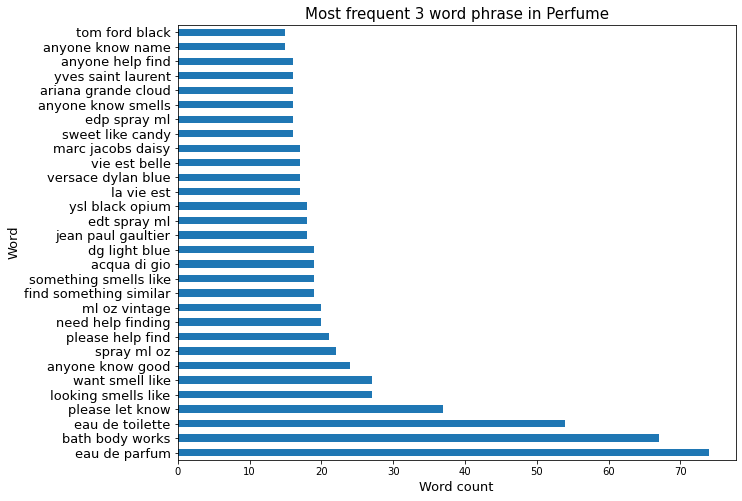

In [53]:
# Visualization for perfume (Tri-grams)
plt.figure(figsize=(10,8))
pcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 3 word phrase in Perfume', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [54]:
# Makeup texts top frequency 3 word phases
mcv3 = count_vec_3(makeup2['post'])
mcv3.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


anyone know good                43
acne prone skin                 42
lauder double wear              36
would greatly appreciated       30
first impression review         30
need help finding               25
none stuff sponsored            24
please let know                 24
also none stuff                 24
happy also none                 24
full coverage foundation        23
stuff sponsored fun             23
primer setting spray            22
estée lauder double             22
anastasia beverly hills         21
tarte shape tape                20
oily acne prone                 20
skin care routine               19
available profile interested    18
want look like                  18
vegan cruelty free              17
pictures available profile      17
opinion experience regarding    17
note opinion experience         17
light medium coverage           17
even skin tone                  16
double wear foundation          16
price per shade                 16
quality always use  

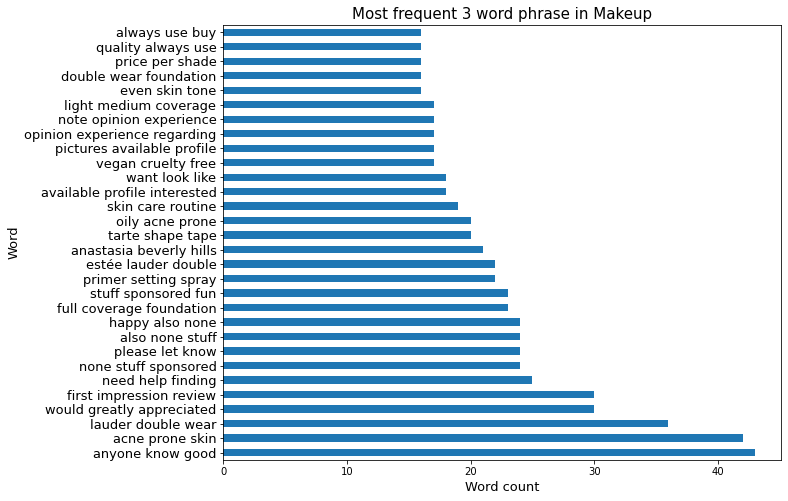

In [55]:
# Visualization for makeup (Tri-grams)
plt.figure(figsize=(10,8))
mcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 3 word phrase in Makeup', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [56]:
# Perfume and Makeup texts top frequency 3 word phases
pmcv3 = count_vec_3(perfume_makeup['post'])
pmcv3.sum().sort_values(ascending=False).head(30).T

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


eau de parfum                73
bath body works              67
anyone know good             66
please let know              61
eau de toilette              54
need help finding            45
acne prone skin              42
would greatly appreciated    41
lauder double wear           36
first impression review      30
would really appreciate      28
want smell like              27
please help find             27
looking smells like          27
wondering anyone knows       25
find something similar       25
happy also none              24
none stuff sponsored         24
also none stuff              24
full coverage foundation     23
stuff sponsored fun          23
anyone help find             23
primer setting spray         22
estée lauder double          22
help would appreciated       21
looking something similar    21
would much appreciated       21
anastasia beverly hills      21
would love hear              21
anyone know similar          20
dtype: int64

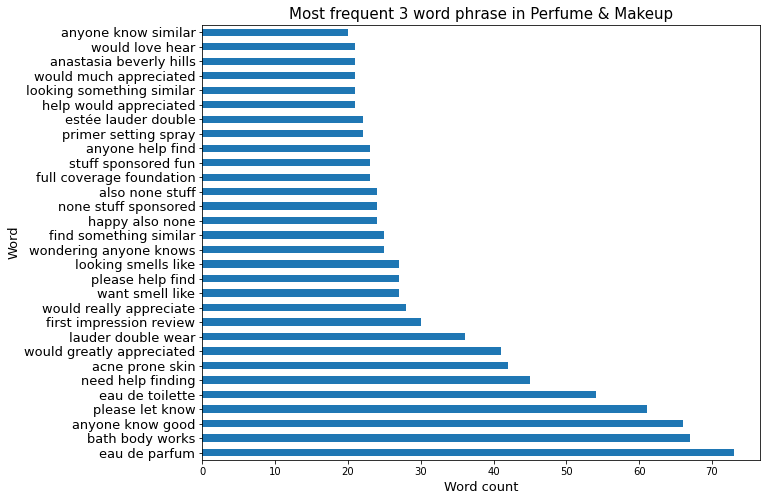

In [57]:
# Visualization for perfume & makeup (Tri-grams)
plt.figure(figsize=(10,8))
pmcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 3 word phrase in Perfume & Makeup', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

Observsations:

Concluding Remarks for Ngram Visualization
We aggregate our findings through our unigram, bigram and trigram visualization. We note that among the top 10 words used in unigrams, bigrams and trigrams, there is little similarity between the two subreddits. The large proportion of difference in ngram usage frequency suggests that our tokens will provide a significant predictive value in our model.


In observing our bigrams and trigrams, we gained a greater contextual understanding of the difference in the nature of the subreddits.


For Perfume:

Bi-Grams:
We have phrases like "smells like," "smells like," and "signature scent" for perfumes.
We have phrases that buyers use to indicate they are looking for specific perfumes, such as "something similar" and "looking something."

Tri-Grams:
We have phrase like 'eau de parfum' indicating people in perfume are quite specific on what they are looking for.
Similar to Bi-grams, we have customers who are unclear of the brand and ask for a scent that smells like a particular brand with phrases like ' looking smells like', 'want smell like' and 'find something similar.


For Makeup:


Bi-Grams:
For makeup, we have terms like "dry skin," "oily skin," and "dark circle." These indicate that customers search for their beauty items using such evocative terms.
We have words that customers use to describe their search for particular cosmetics, such as "bb cream," "setting powder," "foundation concealer," and "eyeshadow palette."

Tri-Grams:
We can notice that customers use terms like "anyone know good" and "first impression review" while looking for recommendations from other customers.
Similar to bi-grams, we have clients who search for their beauty products using descriptive phrases like "acne prone skin," "oily acne prone," and "double wear foundation."


For both perfume and makeup:
We can see that stopwords are crucial for this Reddit as well as for verbs like "smell" or "see." The machine will have a difficulty if those terms are removed because many other similar expressions exist, such as "something like," "smell like," and "look like."

# Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

In [58]:
# Creating a function for TFID Vectorizer
def tfidfv (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect = TfidfVectorizer(max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf = tfidf_vect.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = tfidf_vect.get_feature_names()
    X_tfidf_df
    return X_tfidf_df

In [59]:
# TF-IDF for perfume, makeup and both

ptf = tfidfv(perfumes2['post'])
mtf = tfidfv(makeup2['post'])
pmrtf  = tfidfv(perfume_makeup['post'])

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
# Rankwords by frequency for Perfume
ptf.sum().sort_values(ascending=False).head(15)

like          192.857168
anyone        157.750840
scent         145.898642
know          144.890787
fragrance     127.713733
looking       124.365204
smell         115.418356
help          112.498669
love          109.107854
find          103.732765
similar       103.387489
one           102.260943
smells         98.703079
collection     95.203636
would          91.417623
dtype: float64

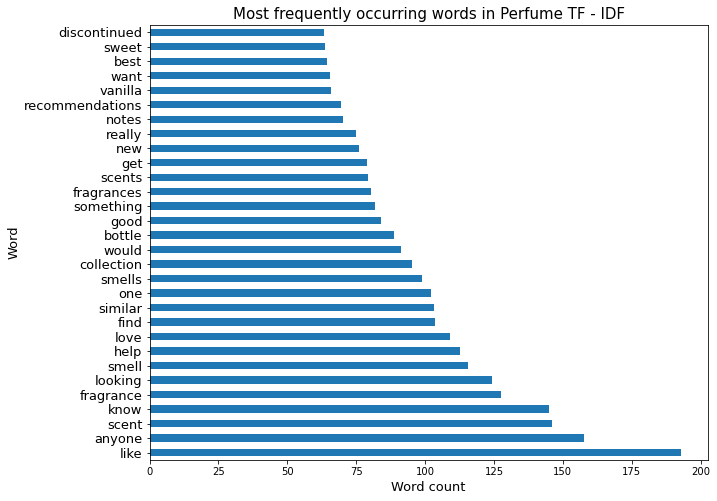

In [61]:
# Visualilzation for perfume
plt.figure(figsize=(10,8))
ptf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [62]:
# Rankwords by frequency for Makeup
mtf.sum().sort_values(ascending=False).head(15)

foundation    224.209069
skin          207.070512
like          187.926874
look          159.082683
help          151.144532
anyone        147.576472
good          146.426089
use           146.190340
know          145.904373
make          145.856600
looking       138.385921
would         131.628782
get           129.953779
eyeliner      123.687167
want          122.621844
dtype: float64

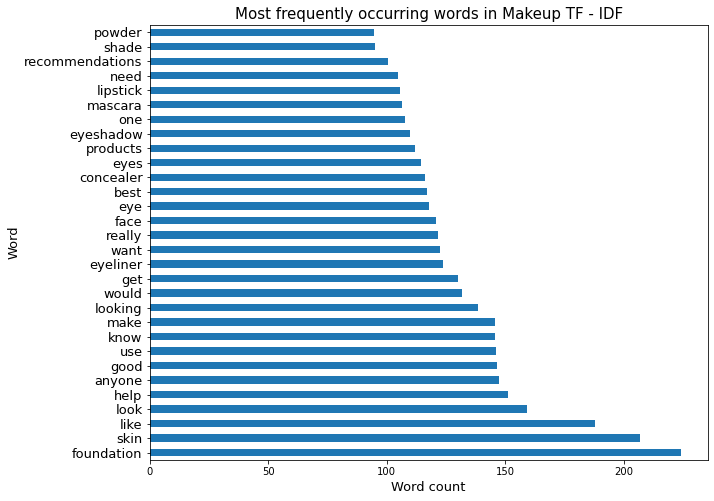

In [63]:
# Visualilzation for Makeup
plt.figure(figsize=(10,8))
mtf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Makeup TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [64]:
# Rankwords by frequency for Perfume & Makeup
pmrtf.sum().sort_values(ascending=False).head(15)

like          383.238628
anyone        310.571894
know          290.906424
looking       266.182523
help          264.678787
foundation    255.182041
skin          249.931998
good          231.719872
would         224.031560
one           215.133457
get           208.675461
find          198.431003
love          197.819032
scent         197.761971
really        197.356690
dtype: float64

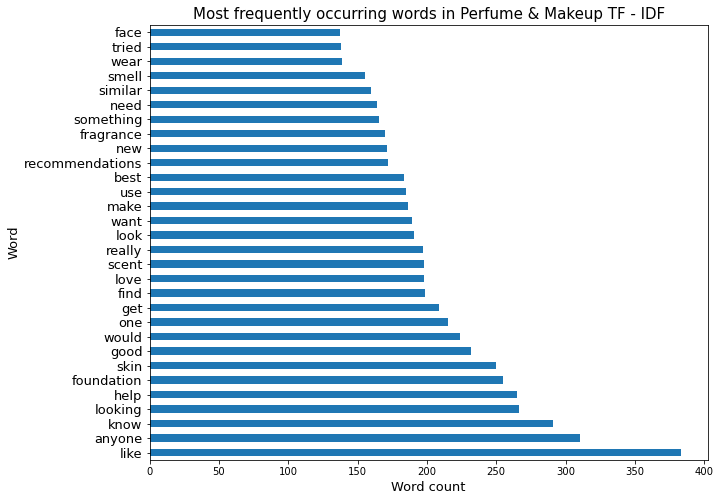

In [65]:
# Visualilzation for Perfume & Makeup
plt.figure(figsize=(10,8))
pmrtf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume & Makeup TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [66]:
# Creating a function for TF-IDF for 2 word phase

def tfidfv2 (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect2 = TfidfVectorizer(ngram_range=(2,2),max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf2 = tfidf_vect2.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df2 = pd.DataFrame(X_tfidf2.toarray())
    X_tfidf_df2.columns = tfidf_vect2.get_feature_names()
    X_tfidf_df2
    return X_tfidf_df2

In [67]:
# TF-IDF for 2 word phase for perfume, makeup and both

ptf2 = tfidfv2(perfumes2['post'])
mtf2 = tfidfv2(makeup2['post'])
pmrtf2  = tfidfv2(perfume_makeup['post'])

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
# Rankwords by frequency for Perfume
ptf2.sum().sort_values(ascending=False).head(15)

anyone know          117.935575
smells like          100.976871
smell like            68.064229
eau de                47.585875
tom ford              42.623153
long lasting          41.678412
years ago             41.631750
help find             38.097580
need help             36.859273
would like            34.348562
looking something     34.162691
please help           34.126220
victoria secret       31.955270
really like           31.429977
something similar     30.725642
dtype: float64

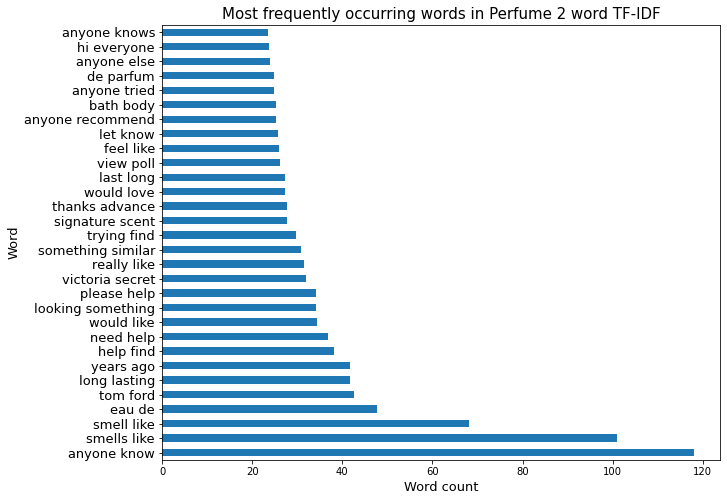

In [69]:
# Visualilzation for Perfume
plt.figure(figsize=(10,8))
ptf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [70]:
# Rankwords by frequency for Makeup
mtf2.sum().sort_values(ascending=False).head(15)

anyone know          92.193128
feel like            76.669878
dry skin             59.754522
please help          58.393083
look like            53.376471
need help            50.623423
oily skin            49.911708
thanks advance       49.260888
skin tone            48.350114
setting spray        47.812503
anyone else          43.730987
really want          42.664427
eyeshadow palette    42.280792
would like           41.769817
setting powder       41.675931
dtype: float64

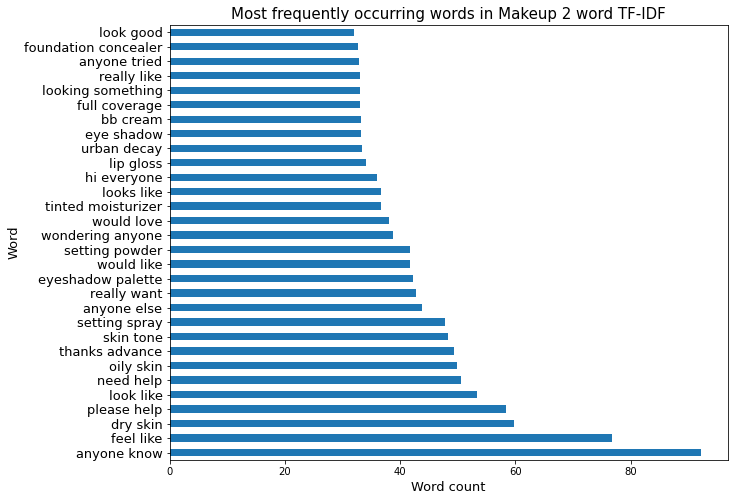

In [71]:
# Visualilzation for Makeup
plt.figure(figsize=(10,8))
mtf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Makeup 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [72]:
# Rankwords by frequency for Perfume & Makeup
pmrtf2.sum().sort_values(ascending=False).head(15)

anyone know          216.936248
smells like          123.576071
feel like            105.175099
please help           93.271128
smell like            88.822923
need help             88.535492
would like            81.174560
thanks advance        78.909304
long lasting          73.369726
years ago             72.181213
looking something     71.544640
anyone else           71.480630
dry skin              68.974350
really like           68.273738
would love            66.247237
dtype: float64

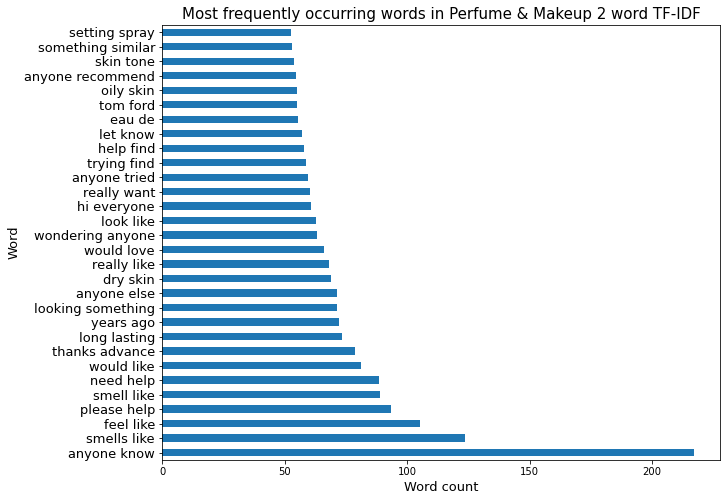

In [73]:
# Visualilzation for Perfume & Makeup
plt.figure(figsize=(10,8))
pmrtf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume & Makeup 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [74]:
# Creating a function for TF-IDF for 3 word phase

def tfidfv3 (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect3 = TfidfVectorizer(ngram_range=(3,3),max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf3 = tfidf_vect3.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df3 = pd.DataFrame(X_tfidf3.toarray())
    X_tfidf_df3.columns = tfidf_vect3.get_feature_names()
    X_tfidf_df3
    return X_tfidf_df3


In [75]:
# TF-IDF for 3 word phase for perfume, makeup and both

ptf3 = tfidfv3(perfumes2['post'])
mtf3 = tfidfv3(makeup2['post'])
pmrtf3  = tfidfv3(perfume_makeup['post'])

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
# Rankwords by frequency for Perfume
ptf3.sum().sort_values(ascending=False).head(15)

bath body works          40.900617
eau de parfum            33.286898
eau de toilette          27.547850
please let know          23.004061
want smell like          21.234368
looking smells like      21.200887
anyone know good         18.881402
please help find         14.449368
need help finding        14.119742
anyone help find         13.565181
anyone know name         13.331157
anyone know dupe         12.927172
something smells like    12.076506
anyone know similar      11.382831
sweet like candy         11.352280
dtype: float64

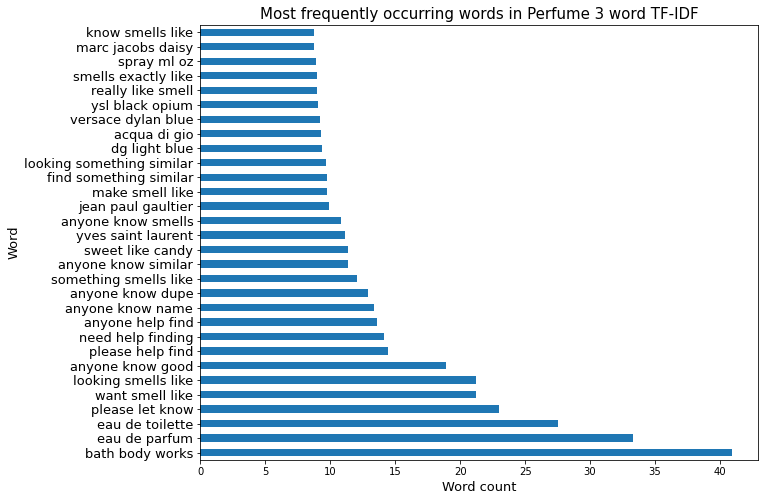

In [77]:
# Visualilzation for Perfume
plt.figure(figsize=(10,8))
ptf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [78]:
# Rankwords by frequency for Makeup
mtf3.sum().sort_values(ascending=False).head(15)

anyone know good             30.743087
acne prone skin              23.076115
would greatly appreciated    19.866174
please let know              19.635987
need help finding            19.255443
lauder double wear           14.819494
skin care routine            13.851499
anastasia beverly hills      13.790878
would love hear              13.235232
tarte shape tape             13.120233
full coverage foundation     13.066975
anyone recommend good        12.133272
want look like               11.809346
vegan cruelty free           11.475114
oily acne prone              11.445956
dtype: float64

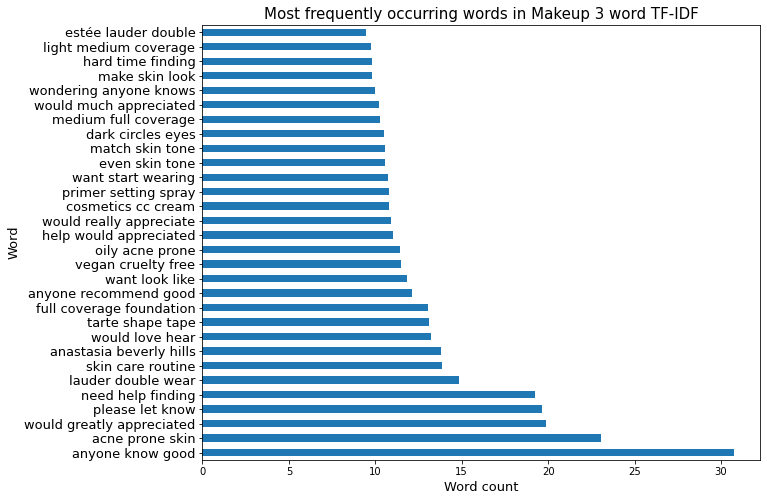

In [79]:
# Visualilzation for Makeup
plt.figure(figsize=(10,8))
mtf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Makeup 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

In [80]:
# Rankwords by frequency for Perfume & Makeup
pmrtf3.sum().sort_values(ascending=False).head(15)

anyone know good             50.575255
bath body works              47.018322
please let know              45.599125
eau de parfum                38.485443
need help finding            36.324495
eau de toilette              35.336527
acne prone skin              25.906772
would greatly appreciated    25.775957
looking smells like          22.462616
want smell like              22.132464
please help find             21.817873
would really appreciate      21.523205
wondering anyone knows       20.512391
anyone help find             19.919530
would love hear              18.400969
dtype: float64

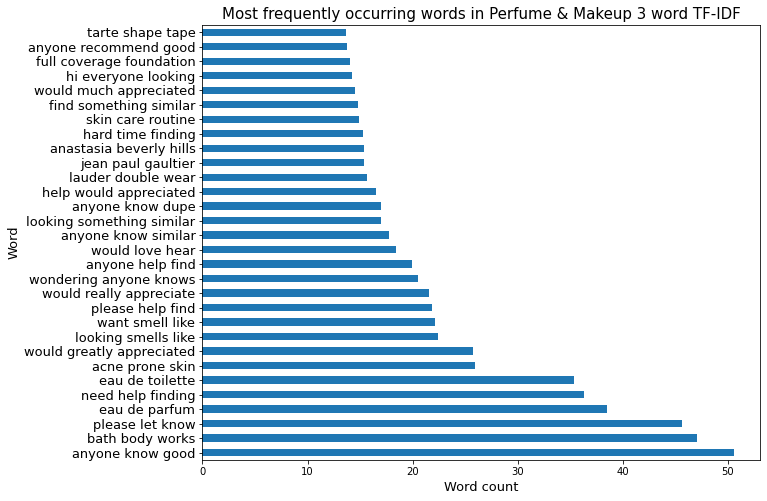

In [81]:
# Visualilzation for Perfume & Makeup
plt.figure(figsize=(10,8))
pmrtf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Perfume & Makeup 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);

Observations:

For perfumes:

TF-IDF:
Common phrases like "like," "smell," and "looking" can be seen, which suggest that customers may be looking for a specific product.

TF-IDF 2 word:
Common phrases like 'anyone know', 'smell like', 'help find' and 'something similar' further suggest that customers may be looking for a specific product.
Phrases like 'tom ford' and 'victoria secret' indicate customers might be giving review or searching more for those brands.

TF-IDF 3 word:
Customers search for specific products using descriptions like "want smell like," "looking smells like," and "something smells like," which are similar to the 1 and 2 word searches.

For Makeup:

TF-IDF:
Common phrases like "foundation" "skin" and "look" can be seen, which suggest that customers may be looking for a specific product.

TF-IDF 2 word:
Common phrases like 'anyone know', 'feel like', 'look like' and 'something similar' further suggest that customers may be looking for a specific product.
Phrases like 'dry skin' and 'oily skin' indicate customers might be looking for products with those terms.

TF-IDF 3 word:
For 3 words, phrases like 'acne prone skin' and 'oily acne prone' further show customers looking for products to cater for those terms.

For both perfume and makeup:
If "smell" and "look" stopwords are added, phrases like "looking smell like" and "want smell like" that are extremely similar to makeup terms may cause difficulty in the machine learning model.


Overall: 
With the CVEC and TVEC we are able to see a trend for makeup and perfume. With regard to makeup, we have seen a tendency for people to discuss the characteristics of the skin type that they might be facing. However, when it comes to scent, we've noticed a trend where people frequently discuss the brands and items they're interested in.

In [82]:
# Saving to csv, This version of dataframe only consist of index and the text
perfumes2.to_csv('../datasets/perfumes2.csv', index=False)
makeup2.to_csv('../datasets/makeup2.csv', index=False)
perfume_makeup.to_csv('../datasets/perfume_makeup.csv', index=False)

# Head over to Project 3 Part 3 for Processing & Modeling